In [36]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
flowmap_raw = np.load('flowmap.npy')

In [3]:
flowmap_angle = np.array([[math.atan2(flowmap_raw[i,j][1], flowmap_raw[i,j][0]) 
                           for j in range(flowmap_raw.shape[1])] 
                           for i in range(flowmap_raw.shape[0])])

In [4]:
for i in range(flowmap_raw.shape[0]):
    for j in range(flowmap_raw.shape[1]):
        if flowmap_raw[i,j,0]==flowmap_raw[i,j,1]==0:
            flowmap_angle[i,j] = -4

<AxesSubplot:>

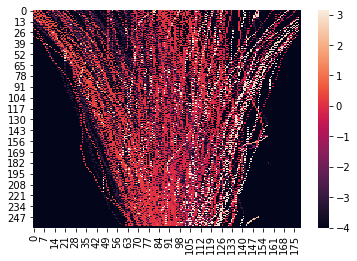

In [66]:
sns.heatmap(flowmap_angle)

In [5]:
def angle2dir(angle):
    if -math.pi/8<angle<math.pi/8:
        return 1
    if math.pi/8<angle<3*math.pi/8:
        return 2
    if 3*math.pi/8<angle<5*math.pi/8:
        return 3
    if 5*math.pi/8<angle<7*math.pi/8:
        return 4
    if 7*math.pi/8<angle<8*math.pi/8:
        return 5
    if -8*math.pi/8<angle<-7*math.pi/8:
        return 5
    if -7*math.pi/8<angle<-5*math.pi/8:
        return 6
    if -5*math.pi/8<angle<-3*math.pi/8:
        return 7
    if -3*math.pi/8<angle<-1*math.pi/8:
        return 8
    return 0

In [67]:
def angle2dir(angle):
    if -math.pi/8<angle<math.pi/8:
        return 1
    if math.pi/8<angle<3*math.pi/8:
        return 2
    if 3*math.pi/8<angle<5*math.pi/8:
        return 3
    if 5*math.pi/8<angle<7*math.pi/8:
        return 4
    if 7*math.pi/8<angle<8*math.pi/8:
        return 1
    if -8*math.pi/8<angle<-7*math.pi/8:
        return 1
    if -7*math.pi/8<angle<-5*math.pi/8:
        return 2
    if -5*math.pi/8<angle<-3*math.pi/8:
        return 3
    if -3*math.pi/8<angle<-1*math.pi/8:
        return 4
    return 0

In [38]:
def angle2dir(angle):
    if -math.pi/4<angle<math.pi/4:
        return 1
    if math.pi/4<angle<3*math.pi/4:
        return 2
    if 3*math.pi/4<angle<4*math.pi/4:
        return 3
    if -4*math.pi/4<angle<-3*math.pi/4:
        return 3
    if -3*math.pi/4<angle<-math.pi/4:
        return 4
    return 0

In [ ]:
def angle2dir(angle):
    if -math.pi/4<angle<math.pi/4:
        return 1
    if math.pi/4<angle<3*math.pi/4:
        return 2
    if 3*math.pi/4<angle<4*math.pi/4:
        return 3
    if -4*math.pi/4<angle<-3*math.pi/4:
        return 3
    if -3*math.pi/4<angle<-math.pi/4:
        return 4
    return 0

In [41]:
def angle2dir(angle):
    if angle == -4:
        return 0
    if -math.pi/2<angle<math.pi/2:
        return 1
    else:
        return 2

In [68]:
def majority_vote(data):
    counts = np.bincount(data)
    if len(counts) > 1:
        return np.argmax(counts[1:]) + 1
    else:
        return 0

In [69]:
flowmap_direction = np.array([[angle2dir(flowmap_angle[i,j]) for j in range(flowmap_angle.shape[1])] 
                              for i in range(flowmap_angle.shape[0])])

In [74]:
step = 4
kernel_size = 2

flowmap_direction_down_sampled = np.array([[majority_vote(flowmap_direction[i-kernel_size:i+kernel_size+1,j-kernel_size:j+kernel_size+1].flatten()) 
                                            for j in range(step-1,flowmap_angle.shape[1],step)] 
                                            for i in range(step-1,flowmap_angle.shape[0],step)])
flowmap_angle_down_sampled = np.array([[np.average(flowmap_angle[i-kernel_size:i+kernel_size+1,j-kernel_size:j+kernel_size+1].flatten()) 
                                            for j in range(step-1,flowmap_angle.shape[1],step)] 
                                            for i in range(step-1,flowmap_angle.shape[0],step)])

In [71]:
flowmap_direction_down_sampled.shape

(65, 45)

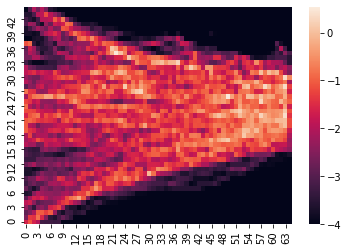

In [75]:
sns.heatmap(np.transpose(flowmap_angle_down_sampled)).invert_yaxis()

In [76]:
np.save('flowmap_direction_down_sampled.npy', flowmap_direction_down_sampled)

In [56]:
def dir2vec(direction,i,j):
    scale = 2
    if direction == 1:
        return (i+scale,j+0)
    if direction == 2:
        return (i+scale,j+scale)
    if direction == 3:
        return (i+0,j+scale)
    if direction == 4:
        return (i+(-scale),j+scale)

<AxesSubplot:>

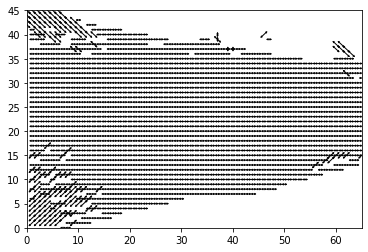

In [57]:
fig, axs = plt.subplots(nrows=1)
axs.set_xlim(0, flowmap_direction_down_sampled.shape[0])
axs.set_ylim(0, flowmap_direction_down_sampled.shape[1])
for i in range(flowmap_direction_down_sampled.shape[0]):
    for j in range(flowmap_direction_down_sampled.shape[1]):
        if flowmap_direction_down_sampled[i,j]!=0:
            axs.add_patch(patches.FancyArrowPatch((i,j), dir2vec(flowmap_direction_down_sampled[i,j],i,j), arrowstyle='<->', mutation_scale=3))
axs

In [ ]:
x: -6.5~6.5, y: -4.5 ~ 4.5 -> x:0~64, y:0~44

In [44]:
resolution = 0.2
centX = 32.5
centY = 22.5

In [54]:
int(4.4999/0.2 + centY)

44

In [228]:
centerX = 43
centerY = 30
resolution = 13/87

In [229]:
6.5/resolution + centerX

86.5

In [ ]:
center, resolution

In [221]:
flowmap_direction_down_sampled.shape

(87, 60)

In [129]:
plt.show()

In [123]:
a = plt.figure()

<Figure size 432x288 with 0 Axes>

In [125]:
plt.show()

In [47]:
import matplotlib.pyplot as plt

In [117]:
import matplotlib.patches as patches

p1 = patches.FancyArrowPatch((0, 0), (10, 10), arrowstyle='<->', mutation_scale=20)
p2 = patches.FancyArrowPatch((1, 0), (0, 1), arrowstyle='<|-|>', mutation_scale=20)

(0.0, 2.0)

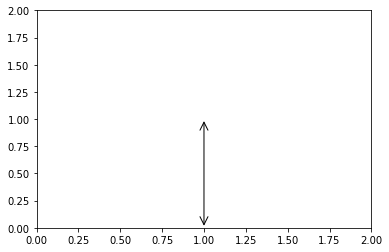

In [132]:
fig, axs = plt.subplots(nrows=1)
# axs.add_patch(p1)
# axs
axs.add_patch(patches.FancyArrowPatch((10, 10), (1, 1), arrowstyle='<->', mutation_scale=20))
axs.set_xlim(0, 2)
axs.set_ylim(0, 2)